In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [12]:
def gaussian(x, A, mu, sigma, c): return A*np.exp(-(x-mu)**2/(2*sigma**2)) + c
def fit_gauss(xs, ys, p0=None):
    # popt, pcov = curve_fit(f=gaussian, xdata=xs, ydata=ys, p0=p0, maxfev=5000)
    xFit = np.arange(min(xs)-20,max(xs)+20, 2e-4)
    A, mu, sigma, c = 1.741, 178.1, 7.164, 1.5e-2
    return xFit, gaussian(xFit, A, mu, sigma, c), (A, mu, sigma, c)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


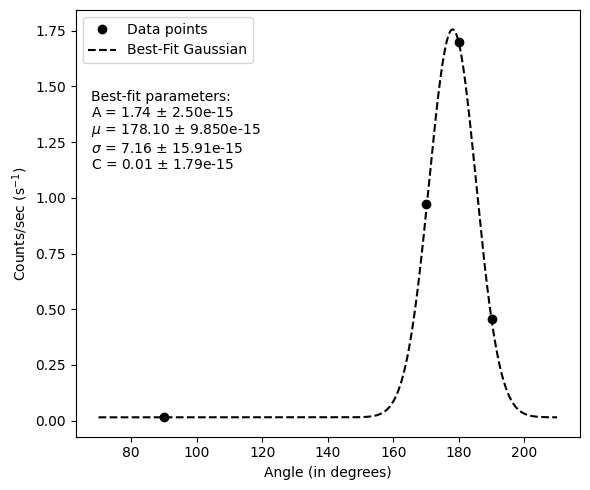

In [30]:
x = [90,170,180,190]
y = [0.015,0.972,1.699,0.458]
fits = fit_gauss(x,y)
plt.figure(figsize=(6,5))
plt.plot(x,y, 'ko', label='Data points')
plt.plot(fits[0], fits[1], '--k', label='Best-Fit Gaussian')
plt.ylabel(r'Counts/sec (s$^{-1}$)')
plt.xlabel('Angle (in degrees)')
label = f'Best-fit parameters:\nA = {1.741:.2f}' + r' $\pm$ ' + f'{2.5:.2f}e-15\n' \
        + r'$\mu$' + f' = {178.1:.2f}' + r' $\pm$ ' + f'{9.85:.3f}e-15\n' \
        + r'$\sigma$' + f' = {7.164:.2f}' + r' $\pm$ ' + f'{15.91:.2f}e-15\n' \
        + r'C' + f' = {1.5e-2:.2f}' + r' $\pm$ ' + f'{1.79:.2f}e-15\n'
plt.text(0.16,0.62,label, fontsize=10,transform=plt.gcf().transFigure)
plt.legend()
plt.tight_layout()
plt.savefig('images/plt.eps')